In [1]:
import numpy as np
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt

In [2]:
# 均方误差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
def cross_entropy_error(y, t):
    delta = 1e-7  # 防止负无穷的产生
    return -np.sum(t * np.log(y + delta))

In [5]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

## Mini-batch

In [8]:
import sys
import os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

In [9]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [11]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [13]:
np.random.choice(60000, 10)

array([39530, 13389, 17817,  7382,  1276, 15394, 47719, 41737, 30416,
       52507])

In [14]:
# Update error
# for one-hot encoding
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [16]:
np.array(t).ndim

1

In [17]:
# For classification label
def cross_entropy_error_label(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 数值微分

In [18]:
np.float32(1e-50)

0.0

In [19]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

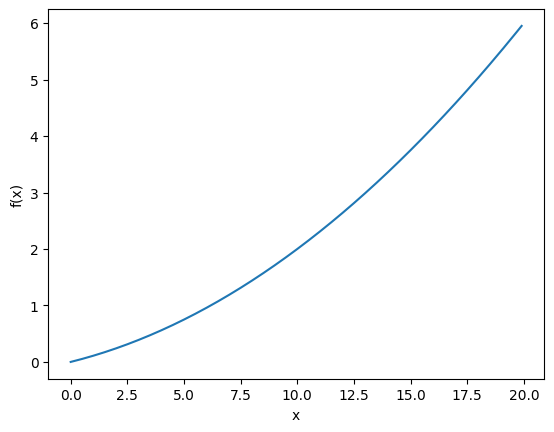

In [20]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [21]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2*h)

In [23]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [24]:
# 偏导数
def function_2(x):
    return x[0]**2 + x[1]**2

In [25]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [26]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [27]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [28]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [29]:
# 梯度
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad



In [30]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

## 梯度下降法